In [1]:
import os
import json
import random

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import collections  as mc
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras import layers

random.seed(1337)
np.random.seed(451)

Using TensorFlow backend.


In [2]:
def data_from_file(file):
    # Read json sequence data
    with open(file) as f:
        data = np.array(json.load(f))
    return data

In [3]:
# Hyperparameters
# ======================================================================
num_classes = 10         # Amount of k-means clusters & classes for NN
batch_size = 128         # How many samples are in a batch
seq_len = 10             # How long is the sequence / sample to train
data_split = 0.2         # Percentage for validation & testing set

num_layers = 1           # Number of hidden LSTM layers
num_units = 256          # Number of units per LSTM layer
epochs = 10              # How many epochs to train
dropout = 0.1

# Data sources
# ======================================================================
# data = data_from_file('./files/json/sequence.json')
# data = data_from_file('./files/json/sequence2.json')
data = data_from_file('./files/json/sequence3.json')

In [9]:
def chunks(l, n):
    n = max(1, n)
    return (l[i:i+n] for i in range(0, len(l), n))

def k_means_encode_data(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data[:,0])
    new_data = []
    for column in data:
        new_column = []
        for point in column:
            predicted = kmeans.predict([point])[0]
            new_column.append(predicted)
        new_data.append(new_column)
    return np.array(new_data), kmeans

def k_means_decode_data(data, kmeans):
    new_data = []
    for column in data:
        new_column = []
        for cluster_index in column:
            center = kmeans.cluster_centers_[cluster_index]
            new_column.append(center)
        new_data.append(new_column)
    return np.array(new_data)

def simplify_encoded_data(data, chunk_size=10):
    chunked = chunks(data, chunk_size)
    for chunk in chunked:
        print(chunk)
        # counts = np.bincount(a)
        # np.argmax(counts)

# Simplify the PCA space with k-means clustering
encoded_data, kmeans = k_means_encode_data(data, num_classes)

# ... and even more by finding frequently occurring classes
encoded_data = simplify_encoded_data(data)

decoded_data_test = k_means_decode_data(encoded_data, kmeans)
print('Number of classes:', num_classes)
print('Data size:', len(data))

[[[0.46392624 0.26740089]
  [0.44737112 0.24449598]]

 [[0.46968451 0.28602172]
  [0.4477959  0.24509691]]

 [[0.46618529 0.27498461]
  [0.35723804 0.22402391]]

 [[0.46836117 0.28123005]
  [0.19244073 0.28917973]]

 [[0.46647901 0.27774122]
  [0.14659027 0.43482315]]

 [[0.46714783 0.2762641 ]
  [0.18924951 0.38213044]]

 [[0.46838354 0.28492557]
  [0.15571797 0.3261622 ]]

 [[0.46798508 0.27963911]
  [0.13649614 0.3636413 ]]

 [[0.46815139 0.28061522]
  [0.17977006 0.35686599]]

 [[0.46701496 0.27838254]
  [0.22238868 0.33770182]]]
[[[0.46675589 0.27696221]
  [0.19763924 0.34430798]]

 [[0.46712573 0.27575383]
  [0.24405728 0.32639468]]

 [[0.4669068  0.27564632]
  [0.31382424 0.36577168]]

 [[0.46731644 0.27979451]
  [0.20528709 0.29331759]]

 [[0.46492643 0.272041  ]
  [0.3166361  0.25645148]]

 [[0.46913887 0.28656719]
  [0.30195834 0.38135095]]

 [[0.46469599 0.26763205]
  [0.32062875 0.28210106]]

 [[0.46302658 0.26857803]
  [0.45727288 0.23987656]]

 [[0.46615276 0.27750946]
  

[[[0.37059521 0.23964336]
  [0.24676249 0.39840918]]

 [[0.36900025 0.24264226]
  [0.30530629 0.32525185]]

 [[0.38159154 0.2505857 ]
  [0.34909906 0.28577727]]

 [[0.37136598 0.25780579]
  [0.31735747 0.3032461 ]]

 [[0.39556233 0.29170955]
  [0.28734229 0.37891762]]

 [[0.38414948 0.27847036]
  [0.27462453 0.32494408]]

 [[0.3693742  0.2591006 ]
  [0.32848583 0.42591749]]

 [[0.36074593 0.24957916]
  [0.23541153 0.46809166]]

 [[0.3717451  0.25679663]
  [0.22381012 0.45191192]]

 [[0.3484038  0.26318515]
  [0.26799937 0.48572778]]]
[[[0.36868911 0.26651094]
  [0.25317454 0.41631773]]

 [[0.3758654  0.2739291 ]
  [0.34312508 0.36012008]]

 [[0.26869443 0.33842264]
  [0.35259392 0.37843607]]

 [[0.33122194 0.43715225]
  [0.32785571 0.35154568]]

 [[0.3299388  0.34318642]
  [0.25482967 0.47431741]]

 [[0.39482547 0.24004403]
  [0.26307068 0.43348312]]

 [[0.42720614 0.26678606]
  [0.28272314 0.5017666 ]]

 [[0.46509982 0.27419192]
  [0.29761041 0.47242357]]

 [[0.46513148 0.27235419]
  

  [0.2945646  0.31552959]]]
[[[0.46714306 0.27756004]
  [0.27415966 0.31554546]]

 [[0.38962576 0.30697831]
  [0.15294117 0.2088371 ]]

 [[0.37710762 0.28562561]
  [0.25140908 0.20408732]]

 [[0.38108812 0.29649235]
  [0.25957239 0.3569195 ]]

 [[0.37638523 0.34808152]
  [0.34301144 0.29765242]]

 [[0.40087923 0.42423319]
  [0.12520881 0.3803861 ]]

 [[0.27791307 0.42388966]
  [0.27192708 0.27114947]]

 [[0.32376507 0.29668173]
  [0.21923111 0.38672805]]

 [[0.41445279 0.24848489]
  [0.23250526 0.45194649]]

 [[0.4581571  0.27146653]
  [0.20536068 0.58181567]]]
[[[0.46611294 0.27655695]
  [0.31404455 0.48317594]]

 [[0.46733603 0.28501951]
  [0.202683   0.64184529]]

 [[0.45240151 0.25039928]
  [0.27559851 0.32719783]]

 [[0.46375694 0.27228398]
  [0.12613423 0.64350838]]

 [[0.44389929 0.27510201]
  [0.24729574 0.52984435]]

 [[0.3847882  0.29904213]
  [0.22723346 0.60288258]]

 [[0.37281006 0.29480343]
  [0.22568707 0.47494842]]

 [[0.36932076 0.30291718]
  [0.21211636 0.49704908]]



[[[0.46050388 0.26683061]
  [0.29051988 0.36548145]]

 [[0.46383016 0.26671342]
  [0.33406952 0.29268285]]

 [[0.46624698 0.27314227]
  [0.3237684  0.26244201]]

 [[0.46667903 0.27682174]
  [0.45478125 0.26921152]]

 [[0.46729317 0.27449988]
  [0.44243652 0.26037445]]

 [[0.46681074 0.27596627]
  [0.37813833 0.3399098 ]]

 [[0.4652304  0.27070958]
  [0.35778895 0.36262786]]

 [[0.46526485 0.27239078]
  [0.43503551 0.28803354]]

 [[0.4688001  0.28348827]
  [0.3738734  0.3477328 ]]

 [[0.46647074 0.27273557]
  [0.14409217 0.29513475]]]
[[[0.46571448 0.27087001]
  [0.48350951 0.20610425]]

 [[0.46719555 0.27898133]
  [0.40154283 0.27450473]]

 [[0.46819411 0.28283239]
  [0.30223888 0.21828594]]

 [[0.46728131 0.27694427]
  [0.29217444 0.20889262]]

 [[0.46548692 0.27107393]
  [0.30495502 0.21586191]]

 [[0.46707325 0.27685075]
  [0.41587774 0.25290892]]

 [[0.46759266 0.27887289]
  [0.39273349 0.28617304]]

 [[0.46820949 0.27997167]
  [0.41573561 0.29277677]]

 [[0.4666125  0.27313932]
  

[[[0.38560576 0.54231742]
  [0.32255376 0.33468572]]

 [[0.35409421 0.51995426]
  [0.33384525 0.31223348]]

 [[0.37322082 0.36044825]
  [0.35048655 0.29688898]]

 [[0.39298265 0.31806779]
  [0.36096735 0.32333333]]

 [[0.1928156  0.38795572]
  [0.3793129  0.27827982]]

 [[0.24198794 0.41158788]
  [0.35676161 0.29389218]]

 [[0.29032741 0.34704112]
  [0.34671398 0.33218784]]

 [[0.29011301 0.36061643]
  [0.36677063 0.30770295]]

 [[0.30665716 0.34897604]
  [0.22021029 0.43487236]]

 [[0.29900135 0.36834353]
  [0.26390308 0.38364106]]]
[[[0.27761855 0.37870718]
  [0.33536221 0.31989548]]

 [[0.35044885 0.30860257]
  [0.32384631 0.38057423]]

 [[0.24957862 0.38699376]
  [0.33707918 0.39644114]]

 [[0.23407626 0.33726897]
  [0.3334153  0.30005284]]

 [[0.22570188 0.49563021]
  [0.35958335 0.28959545]]

 [[0.23020877 0.33048112]
  [0.34787614 0.32292624]]

 [[0.43070551 0.35594229]
  [0.37540559 0.28867515]]

 [[0.41469263 0.34430995]
  [0.38137622 0.30793597]]

 [[0.40082149 0.36652364]
  

  [0.40747941 0.26965847]]]
[[[0.25594619 0.37689637]
  [0.36283903 0.20607523]]

 [[0.28852281 0.37220076]
  [0.41465984 0.27643275]]

 [[0.40210204 0.34629695]
  [0.41300698 0.266328  ]]

 [[0.38501104 0.32358549]
  [0.43518016 0.29077694]]

 [[0.26388687 0.36887514]
  [0.40465372 0.27170492]]

 [[0.36856847 0.35102374]
  [0.36053003 0.21249053]]

 [[0.40037905 0.32997863]
  [0.39832144 0.26077998]]

 [[0.38879138 0.32273365]
  [0.34385403 0.17898901]]

 [[0.23630194 0.39319391]
  [0.41598461 0.27038056]]

 [[0.3094256  0.36690272]
  [0.39263545 0.24448775]]]
[[[0.26598254 0.39000729]
  [0.4027948  0.20904426]]

 [[0.39414499 0.33148178]
  [0.44063685 0.23584411]]

 [[0.34837929 0.31760388]
  [0.45226344 0.25317929]]

 [[0.25924345 0.36396761]
  [0.4236404  0.27419789]]

 [[0.24612676 0.36945485]
  [0.37004378 0.49259445]]

 [[0.2823653  0.3610833 ]
  [0.34345701 0.48590677]]

 [[0.38852686 0.30994783]
  [0.33393403 0.37991623]]

 [[0.27888063 0.34561953]
  [0.45107712 0.28644381]]



[[[0.23489417 0.27336478]
  [0.28382558 0.20829467]]

 [[0.12777265 0.42439065]
  [0.25729018 0.15720301]]

 [[0.25237724 0.47381977]
  [0.25820079 0.13912863]]

 [[0.21238009 0.36222442]
  [0.31842167 0.16365784]]

 [[0.14233376 0.33866512]
  [0.436388   0.29683059]]

 [[0.24010099 0.22180295]
  [0.33795665 0.58946624]]

 [[0.26651223 0.42335132]
  [0.33688664 0.45306448]]

 [[0.16086135 0.42930766]
  [0.31041722 0.52129927]]

 [[0.13032991 0.5219405 ]
  [0.41649135 0.34103551]]

 [[0.19869922 0.33157582]
  [0.44980094 0.26166736]]]
[[[0.23764068 0.26082271]
  [0.44010824 0.25178736]]

 [[0.20357902 0.30798813]
  [0.45667487 0.25784259]]

 [[0.09935907 0.42021273]
  [0.4457282  0.24212676]]

 [[0.22908338 0.30504441]
  [0.44094713 0.2439842 ]]

 [[0.24271975 0.26426526]
  [0.45532002 0.25242471]]

 [[0.22527752 0.28651043]
  [0.45684822 0.25813901]]

 [[0.306758   0.18611227]
  [0.45583448 0.25725109]]

 [[0.36836424 0.22755359]
  [0.46139711 0.26499657]]

 [[0.44563107 0.2431319 ]
  

[[[0.34849875 0.66996405]
  [0.22058273 0.39394473]]

 [[0.29092622 0.32270132]
  [0.22251251 0.4580175 ]]

 [[0.48892805 0.2508644 ]
  [0.18079346 0.48937236]]

 [[0.40043208 0.23239632]
  [0.21239247 0.419872  ]]

 [[0.29345477 0.20673787]
  [0.20504068 0.44648927]]

 [[0.18310797 0.40615943]
  [0.18291469 0.46778803]]

 [[0.22947907 0.45090933]
  [0.19152578 0.49944627]]

 [[0.34454905 0.35200697]
  [0.2546953  0.43777544]]

 [[0.46095994 0.28970968]
  [0.28141514 0.40510878]]

 [[0.46866716 0.28493739]
  [0.21051113 0.47299344]]]
[[[0.38482769 0.30583436]
  [0.2792946  0.43018145]]

 [[0.4108961  0.67932588]
  [0.257995   0.4049976 ]]

 [[0.60252545 0.56630951]
  [0.25304868 0.42230336]]

 [[0.55540584 0.53805805]
  [0.23394274 0.47983689]]

 [[0.59396723 0.61224138]
  [0.21630456 0.51918272]]

 [[0.60079348 0.54981498]
  [0.20190964 0.524685  ]]

 [[0.6469735  0.61169622]
  [0.31513915 0.51360869]]

 [[0.40030831 0.4916715 ]
  [0.35917451 0.46920475]]

 [[0.33121445 0.29912178]
  

  [0.24949992 0.45857326]]]
[[[0.35928303 0.25319482]
  [0.27506552 0.39748965]]

 [[0.37203657 0.28013169]
  [0.25958619 0.37758644]]

 [[0.35927499 0.25662622]
  [0.26318412 0.3645376 ]]

 [[0.36390302 0.26478014]
  [0.26503275 0.38476603]]

 [[0.34723668 0.30663729]
  [0.2929924  0.36877089]]

 [[0.36199647 0.3132445 ]
  [0.28244498 0.36901192]]

 [[0.34186418 0.289084  ]
  [0.23953852 0.39670715]]

 [[0.35468286 0.26734155]
  [0.2366278  0.34687403]]

 [[0.37909575 0.28625783]
  [0.24552265 0.36662506]]

 [[0.36475735 0.26254332]
  [0.27121645 0.37591556]]]
[[[0.35979248 0.26586876]
  [0.24962063 0.40776122]]

 [[0.36439719 0.25997412]
  [0.24460512 0.3496994 ]]

 [[0.3589947  0.25340845]
  [0.26900077 0.36223575]]

 [[0.38261181 0.26649336]
  [0.24456624 0.43796482]]

 [[0.40214582 0.280094  ]
  [0.22059182 0.48648774]]

 [[0.37582061 0.28918392]
  [0.25506512 0.40819182]]

 [[0.36981838 0.26205104]
  [0.27508433 0.36985509]]

 [[0.35632248 0.24107284]
  [0.27594968 0.35446049]]



[[[0.59664185 0.60992409]
  [0.38940787 0.43169123]]

 [[0.61468715 0.61881186]
  [0.31603114 0.42405321]]

 [[0.63405062 0.62815745]
  [0.31607165 0.38289791]]

 [[0.60448437 0.59799372]
  [0.30939804 0.37826937]]

 [[0.57074491 0.70726594]
  [0.30759331 0.37640479]]

 [[0.5822115  0.69795133]
  [0.32364389 0.42160408]]

 [[0.63759537 0.62664041]
  [0.31496437 0.45193401]]

 [[0.64077983 0.62830968]
  [0.33476422 0.40058027]]

 [[0.60439265 0.61006941]
  [0.32991712 0.34719865]]

 [[0.61364535 0.58180422]
  [0.33941972 0.33889047]]]
[[[0.56504002 0.59756285]
  [0.26059005 0.34215946]]

 [[0.54371486 0.57369074]
  [0.33767968 0.2415426 ]]

 [[0.51380372 0.59736663]
  [0.41761429 0.23513497]]

 [[0.55822631 0.56852272]
  [0.45307609 0.25305835]]

 [[0.51016271 0.60651288]
  [0.44467261 0.25252465]]

 [[0.53187469 0.56882521]
  [0.44630766 0.25697022]]

 [[0.51460619 0.57621324]
  [0.38425407 0.38667791]]

 [[0.51270477 0.60787837]
  [0.34940013 0.53844749]]

 [[0.50666373 0.5815143 ]
  

[[[0.16353292 0.2612711 ]
  [0.33568652 0.4516522 ]]

 [[0.10199257 0.3195285 ]
  [0.35947393 0.36042033]]

 [[0.14436928 0.28128699]
  [0.29560317 0.35077052]]

 [[0.17154045 0.27367521]
  [0.34042096 0.35205981]]

 [[0.09965256 0.3317164 ]
  [0.33785056 0.35202932]]

 [[0.09072231 0.32111431]
  [0.28227205 0.39351647]]

 [[0.12948156 0.29735646]
  [0.26649638 0.42293177]]

 [[0.14003009 0.26538933]
  [0.34425669 0.24235791]]

 [[0.12481797 0.28608786]
  [0.40786648 0.25292418]]

 [[0.14612193 0.2726543 ]
  [0.43377657 0.24234673]]]
[[[0.14625533 0.27821159]
  [0.44085882 0.25440987]]

 [[0.1368665  0.26793798]
  [0.44622234 0.24172747]]

 [[0.11377596 0.27815761]
  [0.44334354 0.24169214]]

 [[0.13078563 0.26686324]
  [0.449531   0.2522322 ]]

 [[0.09476293 0.31353747]
  [0.41870211 0.22347054]]

 [[0.09902406 0.26789963]
  [0.47366636 0.2474887 ]]

 [[0.07327904 0.31778463]
  [0.46270542 0.25243608]]

 [[0.11576317 0.28484718]
  [0.41994048 0.28308306]]

 [[0.12202029 0.28736396]
  

  [0.40571055 0.8413991 ]]]
[[[0.28502471 0.30405257]
  [0.43993502 0.74092587]]

 [[0.14727871 0.59539152]
  [0.3921607  0.39610228]]

 [[0.25666084 0.46704372]
  [0.32094225 0.39062196]]

 [[0.27988924 0.29503096]
  [0.33116139 0.2941933 ]]

 [[0.43104895 0.2515045 ]
  [0.41692609 0.41634425]]

 [[0.37350731 0.28232653]
  [0.46408537 0.36847712]]

 [[0.34644259 0.25427467]
  [0.28252621 0.54323034]]

 [[0.36831016 0.24295144]
  [0.28213055 0.62355271]]

 [[0.30788934 0.1940763 ]
  [0.32253226 0.39376513]]

 [[0.22991274 0.17553429]
  [0.35873553 0.74456691]]]
[[[0.25409419 0.1519442 ]
  [0.35970049 0.69068703]]

 [[0.34415788 0.16286014]
  [0.36618076 0.39730148]]

 [[0.19592038 0.31626676]
  [0.41506451 0.20693756]]

 [[0.15911834 0.37030129]
  [0.24381651 0.48768509]]

 [[0.19057126 0.4582993 ]
  [0.20701986 0.59428162]]

 [[0.28247296 0.34056595]
  [0.28654722 0.56687516]]

 [[0.17390957 0.51968912]
  [0.43287458 0.74832437]]

 [[0.20970684 0.41516772]
  [0.4810348  0.44933154]]



[[[0.5356236  0.71105656]
  [0.4008677  0.31113583]]

 [[0.54355467 0.78454854]
  [0.4106657  0.28920875]]

 [[0.56276043 0.79462462]
  [0.37410798 0.28166225]]

 [[0.52805569 0.69228153]
  [0.35597906 0.30670687]]

 [[0.50136676 0.70377044]
  [0.31384109 0.32132378]]

 [[0.51490639 0.72009395]
  [0.33639165 0.32448616]]

 [[0.55736263 0.78643963]
  [0.37407352 0.27253367]]

 [[0.538364   0.7328409 ]
  [0.3651901  0.26409851]]

 [[0.56211751 0.70868462]
  [0.37567043 0.30319647]]

 [[0.61864517 0.67271251]
  [0.32480115 0.31968543]]]
[[[0.64242353 0.60925669]
  [0.32808336 0.33330437]]

 [[0.39926759 0.49939276]
  [0.35425787 0.30109348]]

 [[0.20674386 0.36441547]
  [0.40164939 0.29468431]]

 [[0.21282304 0.31272089]
  [0.39156739 0.26760705]]

 [[0.59580379 0.51431372]
  [0.20343361 0.45939961]]

 [[0.65028319 0.51936816]
  [0.25842866 0.47825357]]

 [[0.29319197 0.41200083]
  [0.39557535 0.27849122]]

 [[0.37393863 0.23860516]
  [0.40567515 0.28853727]]

 [[0.21886748 0.28520713]
  

[[[0.34724386 0.38688477]
  [0.39183149 0.24223294]]

 [[0.23717325 0.28260605]
  [0.42265701 0.25234197]]

 [[0.36441439 0.19572572]
  [0.44632437 0.25976532]]

 [[0.59846566 0.57376456]
  [0.451319   0.25134069]]

 [[0.47732617 0.4360581 ]
  [0.46108318 0.2660021 ]]

 [[0.5102047  0.41321365]
  [0.46062143 0.26600887]]

 [[0.35682326 0.26582406]
  [0.44327895 0.25610698]]

 [[0.30464539 0.28860814]
  [0.45139268 0.28494061]]

 [[0.35510231 0.27917036]
  [0.43708327 0.2836224 ]]

 [[0.30222458 0.25817242]
  [0.41745491 0.27687684]]]
[[[0.26065411 0.27227161]
  [0.43449612 0.27306162]]

 [[0.25863947 0.25996275]
  [0.44039113 0.27338256]]

 [[0.28437463 0.27550629]
  [0.44727807 0.26547273]]

 [[0.23883268 0.35164164]
  [0.4517095  0.25923826]]

 [[0.26583514 0.33654457]
  [0.45534308 0.25393473]]

 [[0.28491528 0.35741439]
  [0.45715167 0.26342009]]

 [[0.20921386 0.45160419]
  [0.4627759  0.26772768]]

 [[0.41786678 0.43892663]
  [0.45988711 0.26174599]]

 [[0.57319387 0.51297972]
  

[[[0.39528926 0.4461143 ]
  [0.2903344  0.40132172]]

 [[0.39046831 0.4038898 ]
  [0.19728858 0.43378482]]

 [[0.43615639 0.55521488]
  [0.22844446 0.36260713]]

 [[0.40602016 0.42548489]
  [0.23900393 0.35830328]]

 [[0.31983    0.63026598]
  [0.24323394 0.32877163]]

 [[0.22658039 0.4251689 ]
  [0.18773967 0.36593629]]

 [[0.24897865 0.50138524]
  [0.15410324 0.43721005]]

 [[0.38334315 0.30012423]
  [0.15451961 0.44117072]]

 [[0.42456244 0.44292159]
  [0.10701919 0.4345428 ]]

 [[0.44493578 0.52386957]
  [0.14822082 0.41764521]]]
[[[0.36970786 0.34987625]
  [0.24905971 0.37730987]]

 [[0.42001378 0.50224269]
  [0.28636662 0.35418351]]

 [[0.33067036 0.52557901]
  [0.28289298 0.36426731]]

 [[0.44382873 0.49577856]
  [0.2012537  0.42051054]]

 [[0.40650468 0.43476741]
  [0.10382279 0.48995599]]

 [[0.40290247 0.42366632]
  [0.14470866 0.48318918]]

 [[0.39866611 0.42409796]
  [0.23525506 0.39056999]]

 [[0.30744166 0.40685741]
  [0.16787788 0.42600146]]

 [[0.38340271 0.40147148]
  

[[[0.08782262 0.63941034]
  [0.32647859 0.2255268 ]]

 [[0.18618106 0.59701114]
  [0.2663671  0.19267692]]

 [[0.18386124 0.61460533]
  [0.22004925 0.2879704 ]]

 [[0.15987467 0.52841472]
  [0.19173022 0.52847831]]

 [[0.18047827 0.41856186]
  [0.25426771 0.41774591]]

 [[0.40843505 0.27564761]
  [0.22339026 0.39670919]]

 [[0.46050709 0.26843309]
  [0.33208726 0.26584361]]

 [[0.46345999 0.27152935]
  [0.15140121 0.44354006]]

 [[0.26723548 0.50613656]
  [0.22589756 0.43597547]]

 [[0.3185331  0.32472558]
  [0.27606217 0.38254254]]]
[[[0.26931287 0.31206329]
  [0.24930574 0.29246798]]

 [[0.34539285 0.36679909]
  [0.24926569 0.2573679 ]]

 [[0.09843467 0.55127209]
  [0.19644682 0.51950586]]

 [[0.12117937 0.52352135]
  [0.21606498 0.45451958]]

 [[0.23421044 0.32044773]
  [0.34467457 0.32360364]]

 [[0.36914609 0.24510329]
  [0.25079179 0.28335851]]

 [[0.29228823 0.45997438]
  [0.28494649 0.30580292]]

 [[0.14196937 0.53179495]
  [0.32014016 0.31983291]]

 [[0.26612451 0.3982054 ]
  

[[[0.18440884 0.35975071]
  [0.35342286 0.24664976]]

 [[0.38370714 0.28831078]
  [0.42104192 0.26732011]]

 [[0.29113476 0.47387107]
  [0.33311778 0.24032658]]

 [[0.25994351 0.32660179]
  [0.38279118 0.23491438]]

 [[0.25027462 0.29377202]
  [0.38420309 0.23311193]]

 [[0.24918396 0.42820604]
  [0.34657456 0.24346059]]

 [[0.22775745 0.31722837]
  [0.35910778 0.24524637]]

 [[0.17720383 0.2560213 ]
  [0.32772627 0.25854076]]

 [[0.32807508 0.26028933]
  [0.35224857 0.26526748]]

 [[0.39617412 0.37922053]
  [0.42413899 0.23836693]]]
[[[0.30340578 0.32373975]
  [0.40624758 0.24819335]]

 [[0.16493732 0.30601115]
  [0.44865442 0.24841679]]

 [[0.3831886  0.33605009]
  [0.41569451 0.23382038]]

 [[0.27622374 0.44651372]
  [0.41404321 0.22057298]]

 [[0.24542046 0.32722818]
  [0.37736865 0.27182536]]

 [[0.40557086 0.2300652 ]
  [0.33839379 0.19931255]]

 [[0.34908473 0.36501157]
  [0.34894299 0.2288914 ]]

 [[0.22105425 0.3072436 ]
  [0.34917458 0.20624933]]

 [[0.31028848 0.20923594]
  

[[[0.35476346 0.36762837]
  [0.41895231 0.345948  ]]

 [[0.22522796 0.41151142]
  [0.27130793 0.49181373]]

 [[0.22625689 0.43488133]
  [0.37760581 0.56612959]]

 [[0.32213576 0.37236264]
  [0.39892779 0.57327224]]

 [[0.24155782 0.42982092]
  [0.35707697 0.34044342]]

 [[0.21088911 0.45547617]
  [0.35607739 0.40984063]]

 [[0.20128156 0.28383336]
  [0.39538885 0.40647629]]

 [[0.24671963 0.41077809]
  [0.29507204 0.43485287]]

 [[0.18725131 0.39572655]
  [0.33646106 0.60043034]]

 [[0.2256214  0.32628262]
  [0.25516492 0.54900982]]]
[[[0.19862752 0.22940714]
  [0.20488064 0.52715682]]

 [[0.29593114 0.33416042]
  [0.19074181 0.44532169]]

 [[0.20792699 0.32917862]
  [0.37797095 0.41699256]]

 [[0.37682006 0.36998173]
  [0.4002809  0.45640472]]

 [[0.33346731 0.38015257]
  [0.35055789 0.51132776]]

 [[0.35248226 0.38103975]
  [0.23225197 0.60519668]]

 [[0.30553211 0.42052596]
  [0.37185237 0.71542622]]

 [[0.35640449 0.41007032]
  [0.44167011 0.67001658]]

 [[0.33780564 0.35715626]
  

[[[0.27108589 0.23003737]
  [0.33822372 0.27021401]]

 [[0.39557319 0.28001796]
  [0.18656687 0.3286141 ]]

 [[0.38600703 0.29944191]
  [0.2589879  0.29158061]]

 [[0.32366257 0.2913974 ]
  [0.24386758 0.32339346]]

 [[0.29242537 0.24321131]
  [0.13643548 0.37654622]]

 [[0.35077553 0.41905382]
  [0.26666628 0.29538841]]

 [[0.29413314 0.3790777 ]
  [0.05547314 0.45970244]]

 [[0.309793   0.33425788]
  [0.19435893 0.28938494]]

 [[0.33760837 0.27326727]
  [0.11634701 0.37079202]]

 [[0.36574781 0.33620909]
  [0.26637356 0.31901857]]]
[[[0.29599927 0.27767658]
  [0.25398975 0.33825963]]

 [[0.11130019 0.2435125 ]
  [0.12454806 0.34013163]]

 [[0.35938959 0.20710518]
  [0.20176232 0.29621838]]

 [[0.33722759 0.31975802]
  [0.21087953 0.26378828]]

 [[0.30688019 0.24596383]
  [0.17632547 0.23789997]]

 [[0.29750074 0.32765793]
  [0.28069174 0.24563021]]

 [[0.32687818 0.27034962]
  [0.26012068 0.24774173]]

 [[0.26656451 0.20378413]
  [0.19262641 0.2438716 ]]

 [[0.27779263 0.25123714]
  

[[[0.4101229  0.31653385]
  [0.30446913 0.26999496]]

 [[0.38616381 0.30332247]
  [0.29006078 0.29939009]]

 [[0.39058082 0.30921248]
  [0.30277024 0.30957224]]

 [[0.35419582 0.28933395]
  [0.2771561  0.29701008]]

 [[0.36760458 0.29154232]
  [0.26022967 0.28809629]]

 [[0.35892552 0.29388864]
  [0.27432316 0.30411192]]

 [[0.36000295 0.29525471]
  [0.2685971  0.30617297]]

 [[0.35586799 0.29303849]
  [0.29563979 0.29994089]]

 [[0.3570571  0.28981966]
  [0.29672397 0.2985302 ]]

 [[0.38966516 0.291549  ]
  [0.28152447 0.29127655]]]
[[[0.38590014 0.30319355]
  [0.31170815 0.29163239]]

 [[0.36836075 0.30335754]
  [0.30963516 0.27672808]]

 [[0.34291008 0.28834524]
  [0.31152099 0.27755423]]

 [[0.34777416 0.29697682]
  [0.3341521  0.28779206]]

 [[0.33861601 0.32082967]
  [0.30951619 0.28029549]]

 [[0.36741612 0.2944054 ]
  [0.27995591 0.27404014]]

 [[0.36796599 0.26894246]
  [0.27015545 0.28418632]]

 [[0.3461657  0.33325193]
  [0.24073834 0.2818483 ]]

 [[0.2471398  0.28581361]
  

[[[0.31202019 0.40525299]
  [0.29140353 0.34601436]]

 [[0.23501486 0.32997848]
  [0.24105981 0.26925167]]

 [[0.24533803 0.30601577]
  [0.36844809 0.30668046]]

 [[0.20224709 0.30747264]
  [0.26858794 0.34423336]]

 [[0.1983172  0.29651865]
  [0.25628061 0.38096038]]

 [[0.2711385  0.38554403]
  [0.17077238 0.24956364]]

 [[0.2433563  0.43028567]
  [0.2946115  0.376729  ]]

 [[0.1566634  0.44471426]
  [0.23114614 0.25725383]]

 [[0.29438392 0.42326435]
  [0.35197288 0.32513745]]

 [[0.11862353 0.38326272]
  [0.23629889 0.31385999]]]
[[[0.27406656 0.23560028]
  [0.42801149 0.23290811]]

 [[0.26492109 0.39460205]
  [0.29656008 0.25822806]]

 [[0.30657903 0.31071145]
  [0.32274366 0.21803836]]

 [[0.3670627  0.298206  ]
  [0.33042988 0.38564511]]

 [[0.32216507 0.46897244]
  [0.31111601 0.38289267]]

 [[0.32754685 0.37981493]
  [0.266146   0.39832936]]

 [[0.29276931 0.35337061]
  [0.2730496  0.39179942]]

 [[0.37518909 0.32142   ]
  [0.26552495 0.44697487]]

 [[0.36050631 0.29734035]
  

  [0.28117186 0.42194901]]]
[[[0.19633701 0.39141527]
  [0.30726437 0.31718878]]

 [[0.27497692 0.3705828 ]
  [0.33375118 0.15789663]]

 [[0.16841321 0.55082817]
  [0.38294121 0.33850851]]

 [[0.22260695 0.40329136]
  [0.36859612 0.36377912]]

 [[0.38445868 0.25436796]
  [0.38061567 0.32689897]]

 [[0.32189633 0.2719026 ]
  [0.37006937 0.28045329]]

 [[0.2236875  0.38914788]
  [0.393683   0.33139524]]

 [[0.15804136 0.53055988]
  [0.3709301  0.36326423]]

 [[0.21088089 0.57780767]
  [0.3524229  0.30237196]]

 [[0.22605478 0.44613328]
  [0.39274771 0.35398753]]]
[[[0.35115204 0.25553371]
  [0.35919396 0.34710273]]

 [[0.41790972 0.23979503]
  [0.35403896 0.32767036]]

 [[0.28512889 0.34088172]
  [0.35597172 0.30561859]]

 [[0.38480124 0.23258716]
  [0.31926471 0.27625179]]

 [[0.26135854 0.27311957]
  [0.36330914 0.3106905 ]]

 [[0.17632848 0.29645045]
  [0.38070208 0.32791883]]

 [[0.30851061 0.25692149]
  [0.38490206 0.3031909 ]]

 [[0.32340832 0.25967025]
  [0.34460891 0.31461436]]



  [0.46145044 0.26562918]]]
[[[0.35849662 0.19388022]
  [0.45514858 0.25581384]]

 [[0.36643395 0.20242917]
  [0.42200121 0.2325581 ]]

 [[0.38918223 0.19278503]
  [0.45245425 0.25029797]]

 [[0.36957278 0.23791607]
  [0.36243797 0.26610004]]

 [[0.31866656 0.23624511]
  [0.45819103 0.26228034]]

 [[0.32832373 0.25387243]
  [0.27312849 0.28099649]]

 [[0.3192732  0.29466067]
  [0.44573793 0.2498304 ]]

 [[0.36317436 0.28685307]
  [0.41976511 0.25025544]]

 [[0.29055223 0.19516585]
  [0.38230018 0.28556977]]

 [[0.31128835 0.20422089]
  [0.45761794 0.25557029]]]
[[[0.35987541 0.18542652]
  [0.44014195 0.36798691]]

 [[0.34560985 0.18784852]
  [0.44532816 0.24167253]]

 [[0.34267246 0.21354061]
  [0.45186271 0.36935235]]

 [[0.35468072 0.26383737]
  [0.44498308 0.28993252]]

 [[0.2450604  0.31323672]
  [0.39361219 0.37423958]]

 [[0.24895258 0.21861427]
  [0.45977348 0.26640455]]

 [[0.34993367 0.21631702]
  [0.36850907 0.27289914]]

 [[0.30777401 0.19289236]
  [0.44998203 0.25739214]]



[[[0.45935944 0.26223755]
  [0.29996018 0.30556187]]

 [[0.45432476 0.25174433]
  [0.20276311 0.49113314]]

 [[0.45759029 0.25731258]
  [0.23899805 0.49573731]]

 [[0.4568087  0.2555252 ]
  [0.17863056 0.43962677]]

 [[0.45851772 0.26114542]
  [0.14829351 0.46603714]]

 [[0.45310756 0.25041973]
  [0.31708778 0.22598505]]

 [[0.45727232 0.25576797]
  [0.26901164 0.20805784]]

 [[0.45808472 0.2558751 ]
  [0.29481524 0.20845963]]

 [[0.45299803 0.24984674]
  [0.28723624 0.17805895]]

 [[0.4569752  0.26220793]
  [0.28029128 0.23057402]]]
[[[0.45451431 0.24664186]
  [0.34509424 0.1941637 ]]

 [[0.45805403 0.2598957 ]
  [0.33841816 0.38999773]]

 [[0.45854873 0.25941728]
  [0.25105716 0.51372246]]

 [[0.45230219 0.25600068]
  [0.29141868 0.51634111]]

 [[0.45461431 0.24782573]
  [0.33635252 0.27218778]]

 [[0.45653338 0.25832898]
  [0.2470403  0.2932087 ]]

 [[0.46062675 0.26020165]
  [0.14626904 0.40498153]]

 [[0.45536278 0.25432566]
  [0.25595333 0.37464881]]

 [[0.45361181 0.25094209]
  

  [0.4579209  0.44215075]]]
[[[0.3261544  0.38113701]
  [0.46939076 0.4189438 ]]

 [[0.34346377 0.38811234]
  [0.47326162 0.39733345]]

 [[0.35697576 0.38351392]
  [0.47630366 0.3925276 ]]

 [[0.37837281 0.39521357]
  [0.46730137 0.42100802]]

 [[0.3710296  0.3974841 ]
  [0.47816406 0.39487007]]

 [[0.257662   0.48490148]
  [0.47688886 0.40875963]]

 [[0.35391248 0.3884104 ]
  [0.4235459  0.43243128]]

 [[0.39810207 0.431918  ]
  [0.43867225 0.46189542]]

 [[0.42069113 0.3615078 ]
  [0.46295318 0.4411104 ]]

 [[0.35841104 0.39072009]
  [0.4392523  0.44812462]]]
[[[0.32040845 0.48938111]
  [0.46565362 0.44752825]]

 [[0.46095943 0.48459026]
  [0.47187647 0.43035149]]

 [[0.4219253  0.44836723]
  [0.46460853 0.4134178 ]]

 [[0.33395514 0.35070239]
  [0.46507295 0.41346725]]

 [[0.47274328 0.571861  ]
  [0.46549852 0.41122144]]

 [[0.42744267 0.40191214]
  [0.45986287 0.41198449]]

 [[0.31171606 0.39250376]
  [0.46536564 0.40016371]]

 [[0.39257865 0.29588541]
  [0.47517719 0.38492296]]



[[[0.40853741 0.37957043]
  [0.24501972 0.50092869]]

 [[0.22254867 0.46430201]
  [0.19247888 0.47560698]]

 [[0.2222941  0.331532  ]
  [0.18067121 0.49687142]]

 [[0.14792384 0.48608433]
  [0.21408031 0.49238464]]

 [[0.11827725 0.3104725 ]
  [0.24939681 0.47824698]]

 [[0.25742283 0.28111965]
  [0.28312358 0.45809018]]

 [[0.22208996 0.24866947]
  [0.27012311 0.4406523 ]]

 [[0.19675671 0.3314374 ]
  [0.34036376 0.44516441]]

 [[0.18635351 0.25992625]
  [0.379089   0.48584374]]

 [[0.18793805 0.54964577]
  [0.38452786 0.46301595]]]
[[[0.15895542 0.35028975]
  [0.37788204 0.47904296]]

 [[0.25554921 0.4767662 ]
  [0.31853927 0.50541105]]

 [[0.25208715 0.35088633]
  [0.32754406 0.49101438]]

 [[0.29824668 0.19368884]
  [0.34374637 0.50451051]]

 [[0.34017982 0.1558118 ]
  [0.34872754 0.51121813]]

 [[0.48666223 0.26536243]
  [0.3240609  0.53174648]]

 [[0.47242976 0.43078795]
  [0.34315608 0.50782779]]

 [[0.36536335 0.63776384]
  [0.3397156  0.45922898]]

 [[0.17118748 0.48188823]
  

[[[0.47318082 0.50202185]
  [0.36627564 0.3604636 ]]

 [[0.47815683 0.48860274]
  [0.36858078 0.4502999 ]]

 [[0.46490027 0.4808281 ]
  [0.3881792  0.42915435]]

 [[0.3312012  0.47714953]
  [0.37129003 0.45024982]]

 [[0.18811045 0.44915821]
  [0.25936714 0.38966213]]

 [[0.31879486 0.38199929]
  [0.2463925  0.37519167]]

 [[0.4478459  0.30240955]
  [0.2818827  0.30964085]]

 [[0.38568463 0.24484963]
  [0.34636074 0.29588041]]

 [[0.40793919 0.27885446]
  [0.35782943 0.31301387]]

 [[0.34941865 0.26998409]
  [0.21727719 0.37265505]]]
[[[0.30533    0.30313351]
  [0.26824428 0.25715143]]

 [[0.23592651 0.41868657]
  [0.3798953  0.28338612]]

 [[0.22068097 0.48667817]
  [0.37094553 0.26151011]]

 [[0.18131326 0.63777275]
  [0.37262985 0.27275277]]

 [[0.35771316 0.38496297]
  [0.3695726  0.28062228]]

 [[0.21818323 0.28570792]
  [0.38638846 0.28980164]]

 [[0.13901246 0.24181103]
  [0.36598085 0.29412901]]

 [[0.30681386 0.33870497]
  [0.36779204 0.27816739]]

 [[0.30909904 0.23287622]
  

[[[0.32696078 0.36849524]
  [0.29584373 0.36296719]]

 [[0.21567768 0.37234455]
  [0.25388348 0.29110834]]

 [[0.29903921 0.28089757]
  [0.23064868 0.33784828]]

 [[0.35383741 0.28785966]
  [0.25933956 0.32690566]]

 [[0.30067412 0.23425973]
  [0.25592113 0.34360944]]

 [[0.43560855 0.37306593]
  [0.22201194 0.33417121]]

 [[0.26513169 0.5965591 ]
  [0.23055838 0.30337924]]

 [[0.36651141 0.45702946]
  [0.33940233 0.26202889]]

 [[0.35591383 0.43215659]
  [0.26481455 0.48803626]]

 [[0.14318135 0.42218938]
  [0.27117344 0.48648851]]]
[[[0.24010702 0.52353968]
  [0.26189555 0.48369896]]

 [[0.16874873 0.5453551 ]
  [0.24815994 0.48086818]]

 [[0.21787753 0.34970095]
  [0.32788703 0.28785176]]

 [[0.10732419 0.34934652]
  [0.30699379 0.31807913]]

 [[0.16487998 0.33993741]
  [0.23251917 0.46925026]]

 [[0.28820538 0.25725875]
  [0.18565098 0.52144337]]

 [[0.32544024 0.30930993]
  [0.12381082 0.5721578 ]]

 [[0.35089791 0.33038348]
  [0.27311605 0.41842016]]

 [[0.32157219 0.27416425]
  

[[[0.41367981 0.30741803]
  [0.38631897 0.32457126]]

 [[0.35891969 0.31362576]
  [0.38264235 0.314723  ]]

 [[0.24752119 0.30970804]
  [0.37301248 0.30359051]]

 [[0.3475475  0.27343949]
  [0.38556268 0.30234566]]

 [[0.4216667  0.25124115]
  [0.37235286 0.29719342]]

 [[0.44882009 0.29121209]
  [0.36665373 0.29531162]]

 [[0.46209776 0.26501318]
  [0.37452212 0.29654507]]

 [[0.46362644 0.2661947 ]
  [0.38629776 0.31222988]]

 [[0.4805363  0.28765799]
  [0.37916695 0.30765494]]

 [[0.46400046 0.26899646]
  [0.37411758 0.29942952]]]
[[[0.43802744 0.25048371]
  [0.37443854 0.30393901]]

 [[0.5201155  0.25276864]
  [0.3784035  0.29614824]]

 [[0.46388636 0.30775389]
  [0.39207758 0.3125752 ]]

 [[0.39610565 0.2586749 ]
  [0.37013393 0.30894064]]

 [[0.40624775 0.2517087 ]
  [0.38184    0.32536691]]

 [[0.40794018 0.23887436]
  [0.38251029 0.33355292]]

 [[0.42610266 0.23463062]
  [0.36963306 0.33116896]]

 [[0.45871303 0.2682356 ]
  [0.34916678 0.32361489]]

 [[0.45644982 0.25722153]
  

[[[0.18360114 0.29638575]
  [0.4551849  0.25864852]]

 [[0.25133805 0.24494968]
  [0.45492698 0.24810845]]

 [[0.33108028 0.21193834]
  [0.4538985  0.24688702]]

 [[0.42086223 0.24130505]
  [0.45924321 0.26370363]]

 [[0.31834075 0.36365328]
  [0.47181183 0.3233945 ]]

 [[0.42581623 0.40255177]
  [0.60173273 0.43993352]]

 [[0.32154646 0.3891711 ]
  [0.73556564 0.52426842]]

 [[0.44508734 0.27887273]
  [0.41429402 0.29902631]]

 [[0.34744918 0.40332153]
  [0.37741818 0.21519379]]

 [[0.23686476 0.43032831]
  [0.4367435  0.28978997]]]
[[[0.19022597 0.35652467]
  [0.38506317 0.28107725]]

 [[0.31726519 0.26293538]
  [0.4078515  0.22062439]]

 [[0.44226399 0.26430267]
  [0.4498748  0.2498776 ]]

 [[0.46468557 0.27641886]
  [0.44291425 0.24421063]]

 [[0.46675627 0.27638037]
  [0.43236615 0.26780138]]

 [[0.46500288 0.2729137 ]
  [0.27696784 0.2148249 ]]

 [[0.46633979 0.27771006]
  [0.3619861  0.19616856]]

 [[0.45062428 0.25473338]
  [0.42278114 0.20422503]]

 [[0.45549457 0.27317173]
  

[[[0.28211526 0.18269895]
  [0.3111648  0.31630817]]

 [[0.38331105 0.32426512]
  [0.30840459 0.29060092]]

 [[0.31910197 0.36383955]
  [0.28231316 0.34683623]]

 [[0.36804937 0.31647549]
  [0.30740223 0.3029503 ]]

 [[0.26584587 0.30615004]
  [0.16813218 0.54506912]]

 [[0.27755035 0.27653798]
  [0.22554464 0.35309007]]

 [[0.29002648 0.36794357]
  [0.32577502 0.33077431]]

 [[0.3696963  0.28213143]
  [0.26395778 0.39630975]]

 [[0.34146556 0.38134331]
  [0.48010778 0.21386388]]

 [[0.38518895 0.43143788]
  [0.31121902 0.44941106]]]
[[[0.39945849 0.40154852]
  [0.32256419 0.38368358]]

 [[0.3808011  0.46659991]
  [0.3874273  0.34938615]]

 [[0.41612898 0.39690189]
  [0.30833075 0.3918534 ]]

 [[0.4179698  0.38802286]
  [0.34857252 0.34686853]]

 [[0.42777492 0.38645886]
  [0.26797136 0.46916141]]

 [[0.4043724  0.44118584]
  [0.27248607 0.33363966]]

 [[0.39410391 0.44181461]
  [0.28195481 0.42733572]]

 [[0.37729284 0.35710727]
  [0.31502334 0.35211782]]

 [[0.30123443 0.2923667 ]
  

[[[0.46780595 0.28260229]
  [0.35704518 0.2675952 ]]

 [[0.46607248 0.27621791]
  [0.3540433  0.23081095]]

 [[0.46367728 0.27192713]
  [0.42251249 0.29280936]]

 [[0.41759396 0.29796019]
  [0.37763855 0.23816122]]

 [[0.38437433 0.26989758]
  [0.27686336 0.25222964]]

 [[0.37426771 0.28831119]
  [0.29966159 0.12946984]]

 [[0.36726552 0.28345526]
  [0.36026126 0.28407447]]

 [[0.37387739 0.28458439]
  [0.38705408 0.24154127]]

 [[0.35428047 0.30083021]
  [0.35893692 0.28633643]]

 [[0.39572498 0.27248732]
  [0.38080294 0.26887516]]]
[[[0.37245441 0.25198152]
  [0.39166599 0.30373231]]

 [[0.36921034 0.2536555 ]
  [0.23285429 0.28073259]]

 [[0.3575522  0.21034761]
  [0.26762992 0.26385873]]

 [[0.38354625 0.20363079]
  [0.12656304 0.25397206]]

 [[0.4245746  0.23548093]
  [0.41739232 0.30747977]]

 [[0.45567512 0.26276268]
  [0.44023987 0.3203496 ]]

 [[0.44687912 0.26429402]
  [0.3440589  0.22366234]]

 [[0.40651543 0.24189087]
  [0.23889848 0.31747592]]

 [[0.44050128 0.24937971]
  

[[[0.4062594  0.56005627]
  [0.34417614 0.38256218]]

 [[0.41952826 0.62198876]
  [0.39819212 0.26953735]]

 [[0.42702887 0.56328796]
  [0.41090375 0.26544925]]

 [[0.43265197 0.47221346]
  [0.39756198 0.25334858]]

 [[0.44129363 0.49291853]
  [0.41162222 0.26851288]]

 [[0.451834   0.47782707]
  [0.35197711 0.21050067]]

 [[0.46110476 0.48743685]
  [0.35817057 0.30091613]]

 [[0.44994693 0.5098859 ]
  [0.28966723 0.28666337]]

 [[0.43383473 0.4957266 ]
  [0.34429493 0.28577532]]

 [[0.43802315 0.53965918]
  [0.3889613  0.23445669]]]
[[[0.44515927 0.51091641]
  [0.31263079 0.17068273]]

 [[0.43666157 0.45313834]
  [0.38498307 0.20343332]]

 [[0.43542774 0.48991063]
  [0.39188574 0.19320192]]

 [[0.4216736  0.32009995]
  [0.37782079 0.21722737]]

 [[0.45601809 0.26485629]
  [0.41158476 0.2408192 ]]

 [[0.22735859 0.34921435]
  [0.45517861 0.25696973]]

 [[0.38290821 0.27624131]
  [0.45370694 0.26651664]]

 [[0.43778383 0.24633607]
  [0.44406622 0.29551258]]

 [[0.44863987 0.27023097]
  

[[[0.35145857 0.52359129]
  [0.46184911 0.26683648]]

 [[0.38065737 0.47266427]
  [0.45429264 0.26557976]]

 [[0.38698076 0.5089997 ]
  [0.42081986 0.23985751]]

 [[0.39424618 0.53432136]
  [0.37995234 0.22023845]]

 [[0.43684729 0.48900318]
  [0.3885983  0.22679955]]

 [[0.4353123  0.5049403 ]
  [0.39299719 0.27748821]]

 [[0.43300229 0.47948283]
  [0.35945574 0.28284109]]

 [[0.31136253 0.38796223]
  [0.35275873 0.31949098]]

 [[0.12489563 0.43718287]
  [0.37632379 0.32391414]]

 [[0.13336187 0.51517479]
  [0.35215864 0.28106594]]]
[[[0.15934829 0.49832602]
  [0.36817636 0.30266218]]

 [[0.17048274 0.48649604]
  [0.34042081 0.28638347]]

 [[0.31874288 0.37652095]
  [0.35027662 0.28347575]]

 [[0.44298678 0.43325424]
  [0.37623595 0.30310937]]

 [[0.39896806 0.48570383]
  [0.37699588 0.29819387]]

 [[0.3827115  0.52387127]
  [0.36013375 0.29015603]]

 [[0.39931381 0.65601749]
  [0.34696474 0.30500055]]

 [[0.34564708 0.74300144]
  [0.35136931 0.29445358]]

 [[0.38200745 0.54255924]
  

  [0.30448096 0.1839964 ]]]
[[[0.38018397 0.41606763]
  [0.23123445 0.39576435]]

 [[0.38958907 0.42415788]
  [0.2977983  0.274394  ]]

 [[0.40757156 0.37506675]
  [0.19047402 0.44684173]]

 [[0.35689118 0.41189741]
  [0.22547133 0.36187248]]

 [[0.40648128 0.38743562]
  [0.17281748 0.41989359]]

 [[0.39064748 0.38069683]
  [0.21259975 0.30122083]]

 [[0.26469133 0.32923657]
  [0.31186612 0.25356074]]

 [[0.3538466  0.38843566]
  [0.20923238 0.44040503]]

 [[0.35830761 0.4257955 ]
  [0.21623954 0.39422313]]

 [[0.40333201 0.39097167]
  [0.1756236  0.34221296]]]
[[[0.30974983 0.34867615]
  [0.27405075 0.29800045]]

 [[0.36014937 0.38485399]
  [0.22038383 0.40782686]]

 [[0.41340666 0.31241669]
  [0.21124    0.31171782]]

 [[0.38292101 0.31846808]
  [0.33354216 0.25781887]]

 [[0.39550989 0.35325185]
  [0.31240708 0.26993589]]

 [[0.39096847 0.37467447]
  [0.31437521 0.27061615]]

 [[0.38012839 0.31867416]
  [0.21168457 0.32101786]]

 [[0.36033408 0.31242852]
  [0.18951306 0.43573249]]



  [0.27606575 0.3698333 ]]]
[[[0.31922269 0.27911192]
  [0.15630714 0.40572676]]

 [[0.42878923 0.30692478]
  [0.18939289 0.34068823]]

 [[0.46011054 0.3277869 ]
  [0.16716879 0.43673026]]

 [[0.39743078 0.31248309]
  [0.20263914 0.40648663]]

 [[0.39516508 0.30090521]
  [0.21226815 0.37986118]]

 [[0.40090317 0.29722489]
  [0.18651287 0.45254293]]

 [[0.38888842 0.29611559]
  [0.30010445 0.45489923]]

 [[0.38135308 0.28528903]
  [0.26101767 0.53531989]]

 [[0.38367621 0.28233491]
  [0.17380658 0.55803452]]

 [[0.39052521 0.29246201]
  [0.22385974 0.46376693]]]
[[[0.37456117 0.28433969]
  [0.18017983 0.51123123]]

 [[0.38649711 0.27972082]
  [0.1934058  0.53349207]]

 [[0.38572081 0.27277315]
  [0.30074431 0.39850187]]

 [[0.37818058 0.26933769]
  [0.29708007 0.38859912]]

 [[0.36946448 0.26947558]
  [0.07370009 0.54223916]]

 [[0.37647658 0.27404666]
  [0.09343095 0.53962431]]

 [[0.38193663 0.27456148]
  [0.42856412 0.28062663]]

 [[0.38690709 0.28035688]
  [0.36218528 0.17057926]]



  [0.35896203 0.23851521]]]
[[[0.26477801 0.39440885]
  [0.45071831 0.24020089]]

 [[0.30284294 0.28260708]
  [0.41377586 0.25764928]]

 [[0.37476379 0.18816452]
  [0.40894643 0.30549888]]

 [[0.33731555 0.18216155]
  [0.34676852 0.26664689]]

 [[0.31163876 0.29588718]
  [0.42165241 0.2974638 ]]

 [[0.29542141 0.22939001]
  [0.39003    0.28153296]]

 [[0.29001597 0.22054037]
  [0.39955646 0.28875071]]

 [[0.30042422 0.20383614]
  [0.38762895 0.29100139]]

 [[0.25864988 0.2593478 ]
  [0.39123909 0.28243044]]

 [[0.27864877 0.19551765]
  [0.37341488 0.28411518]]]
[[[0.262746   0.22366142]
  [0.3670198  0.27930352]]

 [[0.26444749 0.22869116]
  [0.35434098 0.32269834]]

 [[0.25936497 0.25259412]
  [0.31704898 0.37820104]]

 [[0.27368741 0.25757293]
  [0.27474635 0.36431025]]

 [[0.29268146 0.26138414]
  [0.28722256 0.26804197]]

 [[0.28688652 0.2721964 ]
  [0.22701331 0.48506588]]

 [[0.31662192 0.25670406]
  [0.31762383 0.33252671]]

 [[0.30079332 0.24166184]
  [0.36569987 0.3769503 ]]



  [0.2792837  0.33042434]]]
[[[0.30727839 0.21005623]
  [0.28962812 0.43255605]]

 [[0.2830151  0.22895545]
  [0.3448723  0.41470891]]

 [[0.3250848  0.22249729]
  [0.26014292 0.48121255]]

 [[0.33458425 0.22095587]
  [0.33237138 0.44261188]]

 [[0.34061639 0.26407584]
  [0.28021905 0.51132715]]

 [[0.31028101 0.21544695]
  [0.28988426 0.49717395]]

 [[0.34616458 0.24767412]
  [0.30058126 0.47364725]]

 [[0.32431426 0.23497186]
  [0.31229248 0.43280397]]

 [[0.33074866 0.22893091]
  [0.3053018  0.43966273]]

 [[0.31522826 0.30311874]
  [0.34430928 0.39765037]]]
[[[0.34065699 0.2021532 ]
  [0.31431785 0.45477871]]

 [[0.32795653 0.26744543]
  [0.32108875 0.4258528 ]]

 [[0.29621146 0.22778303]
  [0.30263635 0.47531463]]

 [[0.3219025  0.25037398]
  [0.21541561 0.34533616]]

 [[0.29902522 0.2799218 ]
  [0.29375321 0.25674035]]

 [[0.33080642 0.22193418]
  [0.26006053 0.28728187]]

 [[0.33986589 0.24358   ]
  [0.27028827 0.31661351]]

 [[0.30164858 0.27613553]
  [0.17762874 0.45010742]]



  [0.2400589  0.28430742]]]
[[[0.23030871 0.38739377]
  [0.30299214 0.23498168]]

 [[0.15696881 0.41710323]
  [0.22805414 0.28962842]]

 [[0.2147142  0.37958068]
  [0.26271934 0.21073455]]

 [[0.22970753 0.35231971]
  [0.3815682  0.20554686]]

 [[0.20584838 0.3526549 ]
  [0.43226699 0.24085449]]

 [[0.28886762 0.37194645]
  [0.42859392 0.23941895]]

 [[0.26114754 0.46914107]
  [0.3531326  0.21343567]]

 [[0.23731547 0.35842928]
  [0.2492016  0.21352785]]

 [[0.23891373 0.37511478]
  [0.18974863 0.26595164]]

 [[0.21668589 0.42112281]
  [0.30014336 0.29940816]]]
[[[0.13499359 0.45993012]
  [0.37756516 0.25446181]]

 [[0.19228869 0.38802917]
  [0.45836848 0.25971658]]

 [[0.23809412 0.34634638]
  [0.46032245 0.26303546]]

 [[0.26034589 0.27673107]
  [0.46207766 0.26727161]]

 [[0.23108231 0.24798381]
  [0.45660537 0.26040796]]

 [[0.28232036 0.4331563 ]
  [0.4602196  0.26059375]]

 [[0.22949879 0.46786055]
  [0.46163045 0.26594038]]

 [[0.36302983 0.33969568]
  [0.46076953 0.26397262]]



[[[0.47680488 0.42745791]
  [0.21076261 0.1706654 ]]

 [[0.44155716 0.45681018]
  [0.40354399 0.09978029]]

 [[0.46427964 0.45848128]
  [0.33898216 0.23392038]]

 [[0.42532137 0.57348627]
  [0.23027235 0.22471457]]

 [[0.44049937 0.53167576]
  [0.32039689 0.15132777]]

 [[0.42900894 0.40984399]
  [0.26807483 0.18893234]]

 [[0.44541498 0.62246174]
  [0.4352845  0.24223963]]

 [[0.42886759 0.59363848]
  [0.40640979 0.21537229]]

 [[0.46319785 0.48622796]
  [0.31481504 0.33018228]]

 [[0.47830946 0.51234958]
  [0.39856147 0.29321842]]]
[[[0.52682104 0.54392238]
  [0.39033017 0.30198088]]

 [[0.49577954 0.48640555]
  [0.35053033 0.33543235]]

 [[0.48306989 0.46563266]
  [0.40505083 0.29867373]]

 [[0.49425934 0.51132038]
  [0.43870021 0.26993768]]

 [[0.47209206 0.54700607]
  [0.38140707 0.20225226]]

 [[0.46568353 0.56575131]
  [0.25007132 0.16660648]]

 [[0.47563514 0.56071077]
  [0.21125484 0.38371183]]

 [[0.46427342 0.48921808]
  [0.20944712 0.2540976 ]]

 [[0.48485331 0.42355634]
  

[[[0.38772126 0.32456621]
  [0.3037169  0.25373228]]

 [[0.38208256 0.31456968]
  [0.30479873 0.41493615]]

 [[0.36597532 0.33544258]
  [0.24458021 0.47039463]]

 [[0.36166939 0.34498929]
  [0.2297103  0.40235937]]

 [[0.35167053 0.39513797]
  [0.30133976 0.39728003]]

 [[0.37343425 0.44938146]
  [0.22613873 0.42637068]]

 [[0.38414558 0.41593549]
  [0.28407069 0.42172417]]

 [[0.40931808 0.41990638]
  [0.31819473 0.40524168]]

 [[0.42884279 0.31690776]
  [0.31214985 0.404622  ]]

 [[0.3986049  0.31493119]
  [0.2938286  0.3789633 ]]]
[[[0.36995411 0.2928149 ]
  [0.26695098 0.54656861]]

 [[0.42571559 0.3097107 ]
  [0.27781916 0.49485846]]

 [[0.3706919  0.29719357]
  [0.356894   0.33256054]]

 [[0.36997695 0.3116085 ]
  [0.32514622 0.30355505]]

 [[0.33582404 0.40858356]
  [0.37372762 0.25832739]]

 [[0.26490307 0.66302164]
  [0.16276475 0.59563784]]

 [[0.31849068 0.60071826]
  [0.23700381 0.70499335]]

 [[0.35766998 0.44693748]
  [0.17066388 0.78542165]]

 [[0.34723182 0.32590408]
  

[[[0.68772654 0.26537163]
  [0.37344002 0.40683435]]

 [[0.70199609 0.40161707]
  [0.36779973 0.44626493]]

 [[0.70158015 0.29757269]
  [0.37851483 0.42314824]]

 [[0.47397099 0.2843087 ]
  [0.3763115  0.42108129]]

 [[0.49650101 0.21555637]
  [0.32102062 0.4607295 ]]

 [[0.73676532 0.06622641]
  [0.35770237 0.42089241]]

 [[0.77548928 0.33061915]
  [0.39598228 0.39972372]]

 [[0.64647996 0.57341809]
  [0.37522426 0.4364359 ]]

 [[0.59842088 0.70280378]
  [0.37712414 0.43155675]]

 [[0.57459755 0.5034744 ]
  [0.37394119 0.43814327]]]
[[[0.49445435 0.36985754]
  [0.38598285 0.4384466 ]]

 [[0.468303   0.28586992]
  [0.40518515 0.43225002]]

 [[0.46678976 0.27813546]
  [0.41292446 0.42079961]]

 [[0.42753046 0.2583616 ]
  [0.41021091 0.41192428]]

 [[0.46382815 0.28292842]
  [0.39009509 0.41700571]]

 [[0.64130178 0.27253797]
  [0.38799011 0.40756219]]

 [[0.62904311 0.30312552]
  [0.37907412 0.41171371]]

 [[0.57167966 0.30553989]
  [0.38129238 0.41221037]]

 [[0.51430795 0.70847889]
  

[[[0.61813187 0.20107937]
  [0.33827055 0.25391097]]

 [[0.60850819 0.18695591]
  [0.21091247 0.47870626]]

 [[0.56754585 0.14223301]
  [0.31597592 0.29572457]]

 [[0.58489625 0.16071282]
  [0.30336506 0.27500164]]

 [[0.60055569 0.20721104]
  [0.28514289 0.29754387]]

 [[0.64416563 0.24465377]
  [0.26416963 0.30969554]]

 [[0.65428686 0.2762906 ]
  [0.31720489 0.39386679]]

 [[0.63604901 0.23663663]
  [0.23428652 0.37306655]]

 [[0.5410471  0.22691517]
  [0.17997243 0.3791297 ]]

 [[0.55837511 0.27105434]
  [0.19654675 0.35181213]]]
[[[0.56953553 0.24762098]
  [0.24105445 0.30928713]]

 [[0.56425593 0.21235749]
  [0.26132127 0.30666494]]

 [[0.5868062  0.16949012]
  [0.21525191 0.31832412]]

 [[0.56846825 0.17149326]
  [0.24401929 0.29310791]]

 [[0.571564   0.14817567]
  [0.23560874 0.2920675 ]]

 [[0.56385582 0.17095788]
  [0.13394744 0.29900965]]

 [[0.55174617 0.17510211]
  [0.1887997  0.30964004]]

 [[0.59703573 0.13198364]
  [0.25668323 0.27939105]]

 [[0.54119071 0.13926768]
  

  [0.46148546 0.26263617]]]
[[[0.13620328 0.61827472]
  [0.46561633 0.27267113]]

 [[0.13917632 0.61680181]
  [0.46272303 0.26413766]]

 [[0.17752164 0.61036433]
  [0.46559012 0.27244698]]

 [[0.15720405 0.64413679]
  [0.46353783 0.26715874]]

 [[0.09507196 0.75815198]
  [0.46544889 0.27130453]]

 [[0.17155676 0.6800417 ]
  [0.45903105 0.26480761]]

 [[0.19480965 0.63824646]
  [0.43070011 0.25056584]]

 [[0.18218771 0.64858055]
  [0.41854248 0.2612214 ]]

 [[0.264816   0.60371264]
  [0.41176324 0.26449563]]

 [[0.2359061  0.59604348]
  [0.4200263  0.26224955]]]
[[[0.2232319  0.60425316]
  [0.42432069 0.26042013]]

 [[0.26721792 0.61083493]
  [0.44747851 0.26435195]]

 [[0.25246892 0.53794479]
  [0.45873738 0.26355095]]

 [[0.13071995 0.55635984]
  [0.45846959 0.26348765]]

 [[0.12577902 0.58404408]
  [0.48018466 0.25671792]]

 [[0.13150443 0.61633598]
  [0.4452453  0.31963306]]

 [[0.1947419  0.60486271]
  [0.40957725 0.31681508]]

 [[0.23082532 0.58250461]
  [0.40248579 0.31494973]]



TypeError: 'NoneType' object is not iterable

In [29]:
# Show an example on how the data looks now
test_index = 0
print('Original:', data[test_index])
print('Encoded:', encoded_data[test_index])print('Decoded:', decoded_data_test[test_index])

Original: [[0.46392624 0.26740089]
 [0.44737112 0.24449598]]
Encoded: [4 4]
Decoded: [[0.45057369 0.26800009]
 [0.45057369 0.26800009]]


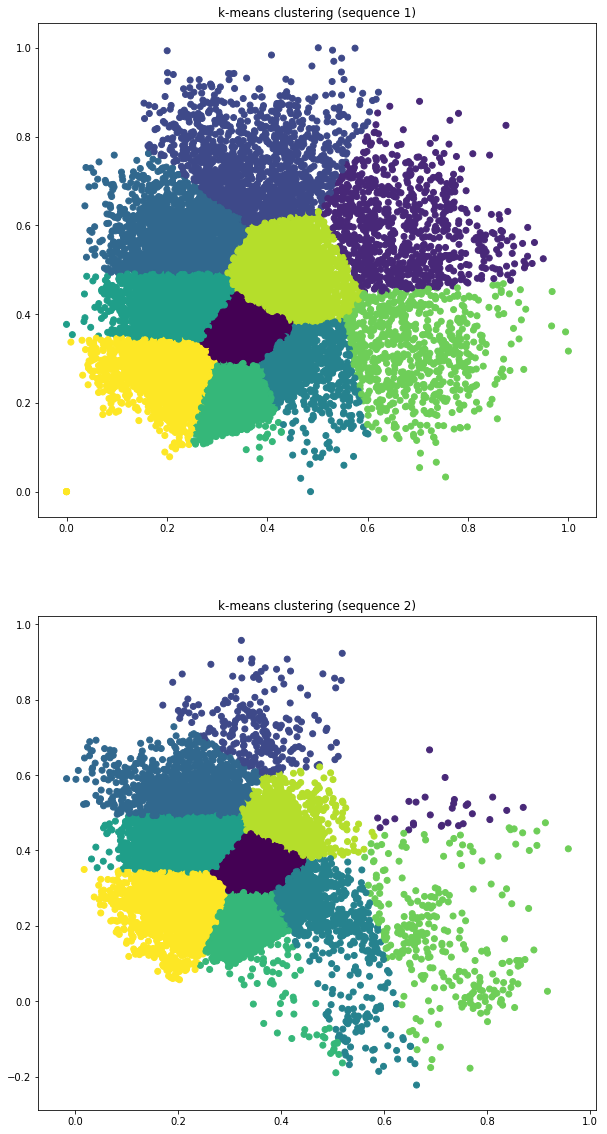

In [45]:
# Plot kmeans clusters
plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1, title="k-means clustering (sequence 1)")
plt.scatter(data[:, 0, 0],
           data[:, 0, 1],
           c=kmeans.predict(data[:, 0]))

plt.subplot(2, 1, 2, title="k-means clustering (sequence 2)")
plt.scatter(data[:, 1, 0],
           data[:, 1, 1],
           c=kmeans.predict(data[:, 1]))

plt.show()

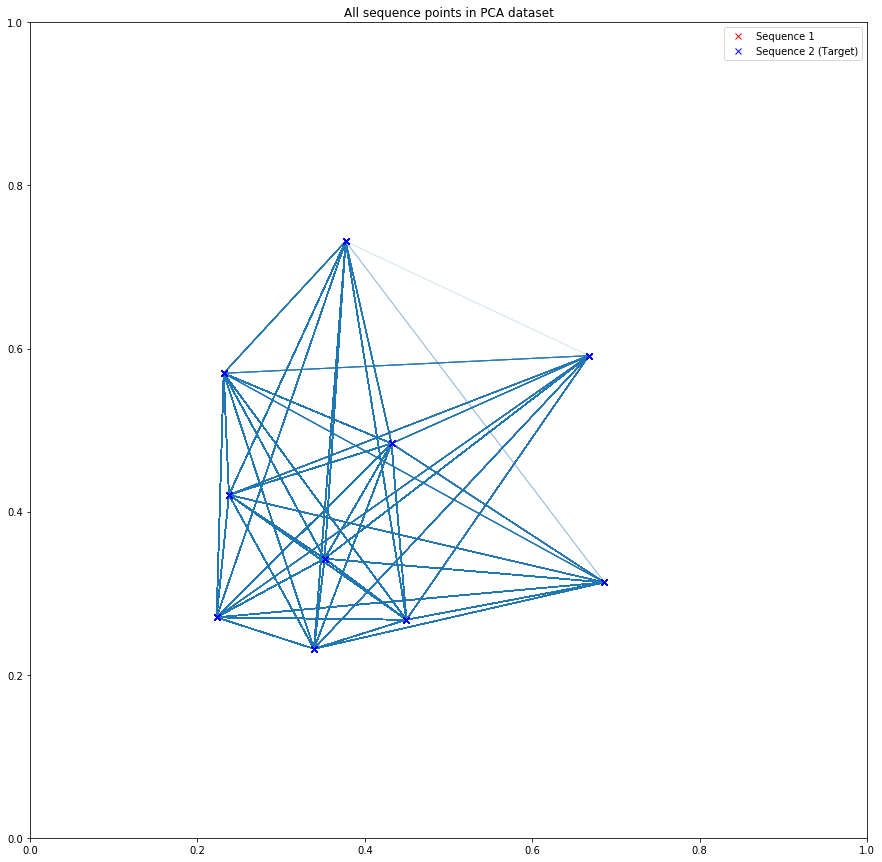

In [15]:
# Plot PCA coordinate data
plot_data = decoded_data_test

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('All sequence points in PCA dataset')
ax.axis([0.0, 1.0, 0.0, 1.0])

ax.plot(plot_data[:,0,0], plot_data[:,0,1], 'rx', label='Sequence 1')
ax.plot(plot_data[:,1,0], plot_data[:,1,1], 'bx', label='Sequence 2 (Target)')

lines = [[p[0], p[1]] for p in plot_data]
lc = mc.LineCollection(lines, linewidths=1, alpha=0.1)
ax.add_collection(lc)

ax.legend()
plt.show()

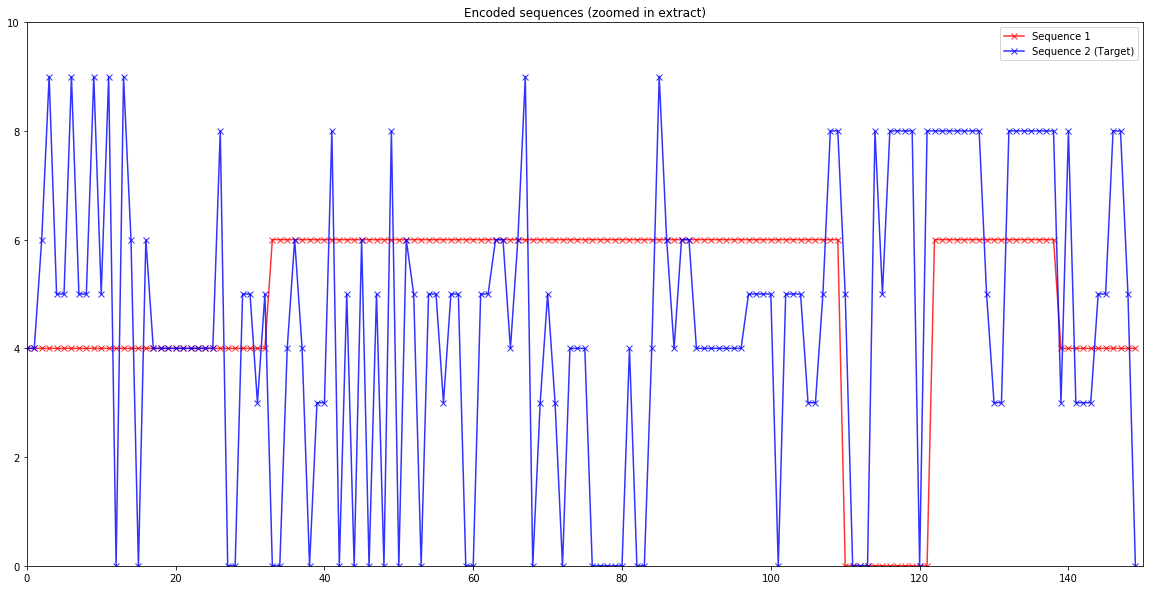

In [55]:
# Plot sequence data
sequence1 = encoded_data[:, 0][:150]
sequence2 = encoded_data[:, 1][:150]

plt.figure(figsize=(20, 10))

plt.plot(range(len(sequence1)), sequence1, color='red', marker='x', label='Sequence 1', alpha=0.8)
plt.plot(range(len(sequence2)), sequence2, color='blue', marker='x', label='Sequence 2 (Target)', alpha=0.8)

plt.legend(frameon=True)
plt.title('Encoded sequences (zoomed in, extract)')
plt.axis([0, max(len(sequence1), len(sequence2)), 0, num_classes])

plt.show()

In [56]:
def generator(data, seq_len, min_index, max_index):
    i = min_index
    while 1:
        if i + batch_size >= max_index:
            i = min_index
        rows = np.arange(i, min(i + batch_size, max_index))
        i += len(rows)
        samples = np.zeros((len(rows), seq_len), dtype='int32')
        targets = np.zeros((len(rows)), dtype='int32')
        for j, _ in enumerate(rows):
            indices = range(rows[j], rows[j] + seq_len)
            if indices[-1] < max_index:
                samples[j] = data[:, 0][indices]
                targets[j] = data[:, 1][indices][-1]
        yield samples, targets

In [57]:
# Split in 3 sets for training, validation and testing
validation_steps = round((data_split / 2) * len(data))

train_max = len(data) - (validation_steps * 2)
val_min = train_max + 1
val_max = train_max + validation_steps + 1
test_min = train_max + validation_steps + 2
test_max = len(data) - 1

training_steps = test_max - test_min

train_gen = generator(encoded_data,
                      seq_len=seq_len,
                      min_index=0,
                      max_index=train_max)

val_gen = generator(encoded_data,
                    seq_len=seq_len,
                    min_index=val_min,
                    max_index=val_max)

test_gen = generator(encoded_data,
                     seq_len=seq_len,
                     min_index=test_min,
                     max_index=test_max)

steps_per_epoch = train_max // batch_size

print('Batch size:', batch_size)
print('Steps per epoch:', steps_per_epoch)

print('\nSplit for validation & test @ {0:.2f}%'.format(data_split * 100))
print('Training set:', (0, train_max))
print('Validation set:', (val_min, val_max))
print('Test set:', (test_min, test_max))

Batch size: 128
Steps per epoch: 224

Split for validation & test @ 20.00%
Training set: (0, 28799)
Validation set: (28800, 32400)
Test set: (32401, 35998)
[[4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 [4 4 4 ... 4 4 4]
 ...
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]
 [6 6 6 ... 6 6 6]]
(128, 10)


In [58]:
model = Sequential()
model.add(layers.Embedding(input_dim=num_classes,
                           output_dim=num_units,
                           input_length=seq_len))
for n in range(num_layers - 1):
    model.add(layers.LSTM(num_units, return_sequences=True))
    if dropout > 0.0:
        model.add(layers.Dropout(dropout))
model.add(layers.LSTM(num_units))
if dropout > 0.0:
    model.add(layers.Dropout(dropout))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 256)           2560      
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 530,442
Trainable params: 530,442
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit_generator(train_gen,
                              steps_per_epoch=steps_per_epoch,
                              epochs=epochs,
                              validation_data=val_gen,
                              validation_steps=validation_steps)

Epoch 1/10
224/224 [==============================] - 139s 621ms/step - loss: 1.9632 - acc: 0.2499 - val_loss: 1.7707 - val_acc: 0.2366
Epoch 2/10
224/224 [==============================] - 134s 596ms/step - loss: 1.9108 - acc: 0.2360 - val_loss: 1.7745 - val_acc: 0.2175
Epoch 3/10
224/224 [==============================] - 134s 599ms/step - loss: 1.9063 - acc: 0.2415 - val_loss: 1.7806 - val_acc: 0.2174
Epoch 4/10
224/224 [==============================] - 134s 598ms/step - loss: 1.9045 - acc: 0.2406 - val_loss: 1.7809 - val_acc: 0.2173
Epoch 5/10
224/224 [==============================] - 138s 616ms/step - loss: 1.9025 - acc: 0.2391 - val_loss: 1.7823 - val_acc: 0.2173
Epoch 6/10
224/224 [==============================] - 128s 572ms/step - loss: 1.9004 - acc: 0.2374 - val_loss: 1.7833 - val_acc: 0.2173
Epoch 7/10
224/224 [==============================] - 128s 571ms/step - loss: 1.8984 - acc: 0.2404 - val_loss: 1.7843 - val_acc: 0.2175
Epoch 8/10
224/224 [============================

In [ ]:
# Plot validation and training loss
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(loss) + 1)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
# Calculate scores with training set
temperature = 1           # Temperature for reweighting the distribution
max_dist = .25            # Maximum distance for max. score penalty

def reweight_distribution(original_distribution, temperature):
    distribution = np.log(original_distribution) / temperature
    distribution = np.exp(distribution)
    return distribution / np.sum(distribution)

scores = []
points = []
points_targets = []

for i in range((training_steps // batch_size)):
    # Predict point from model
    samples, targets = next(test_gen)
    results = model.predict(samples)
    
    for j, result in enumerate(results):
        # Reweight the softmax distribution
        result_reweighted = reweight_distribution(result, temperature)
        result_value = np.argmax(result_reweighted)
        
        # Decode data
        position = decode_data([[result_value]], grid_size).flatten()
        position_target = decode_data([[targets[j]]], grid_size).flatten()
        points.append(position)
        points_targets.append(position_target)

        # Calculate distance between prediction and actual test target
        dist = max_dist - min(max_dist, np.linalg.norm(position - position_target))
        scores.append(0.0 if dist == 0.0 else dist / max_dist)
        
points = np.array(points)
points_targets = np.array(points_targets)
score = np.average(scores)

print('Score: {0:.2f}%'.format(score * 100))

In [ ]:
# Plot model prediction results
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_title('Test targets and model predictions')
ax.axis([0.0, 1.0, 0.0, 1.0])

lines = [[points_targets[i], points[i]] for i in range(len(points))]
lc = mc.LineCollection(lines, linewidths=1)
lc.set_array(np.array(scores))
lc.set_clim(0.0, 1.0)
lc.set_cmap('plasma')
ax.add_collection(lc)

axcb = fig.colorbar(lc)
axcb.set_label('Score')

ax.plot(points_targets[:,0], points_targets[:,1], 'rx', label='Target')

colors = np.array([[s, 0, 0] for s in scores])
ax.scatter(points[:,0], points[:,1], label='Result', color='r', marker='^')

ax.legend()
plt.show()